In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv("Data/insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checking duplicates
sum(df.duplicated(subset = 'region'))
#duplicate values

1334

In [9]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
auto=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']]

In [12]:
auto

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [13]:
# Dimension reduction

In [14]:
gender = pd.get_dummies(auto['sex'], drop_first = True)
gender

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [15]:
auto = pd.concat([auto, gender], axis = 1)
auto

,age,sex,bmi,children,smoker,region,expenses,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1
1334,18,female,31.9,0,no,northeast,2205.98,0
1335,18,female,36.9,0,no,southeast,1629.83,0
1336,21,female,25.8,0,no,southwest,2007.95,0


In [16]:
region_typ = pd.get_dummies(auto['region'], drop_first = True)
region_typ

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
auto = pd.concat([auto, region_typ], axis = 1)
auto

,age,sex,bmi,children,smoker,region,expenses,male,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,1,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,1,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0,1


In [18]:
smoker = pd.get_dummies(auto['smoker'], drop_first = True)
smoker

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [19]:
auto = pd.concat([auto, smoker], axis = 1)

In [20]:
auto

,age,sex,bmi,children,smoker,region,expenses,male,northwest,southeast,southwest,yes
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,1,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,1,0,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,1,0,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,0,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,1,0,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,1,0,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0,1,0


In [21]:
auto.drop(['sex','region','smoker'], axis = 1, inplace = True)

In [22]:
auto

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
0,19,27.9,0,16884.92,0,0,0,1,1
1,18,33.8,1,1725.55,1,0,1,0,0
2,28,33.0,3,4449.46,1,0,1,0,0
3,33,22.7,0,21984.47,1,1,0,0,0
4,32,28.9,0,3866.86,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,1,0,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,1,0,0
1336,21,25.8,0,2007.95,0,0,0,1,0


In [23]:
# Starting machine learning

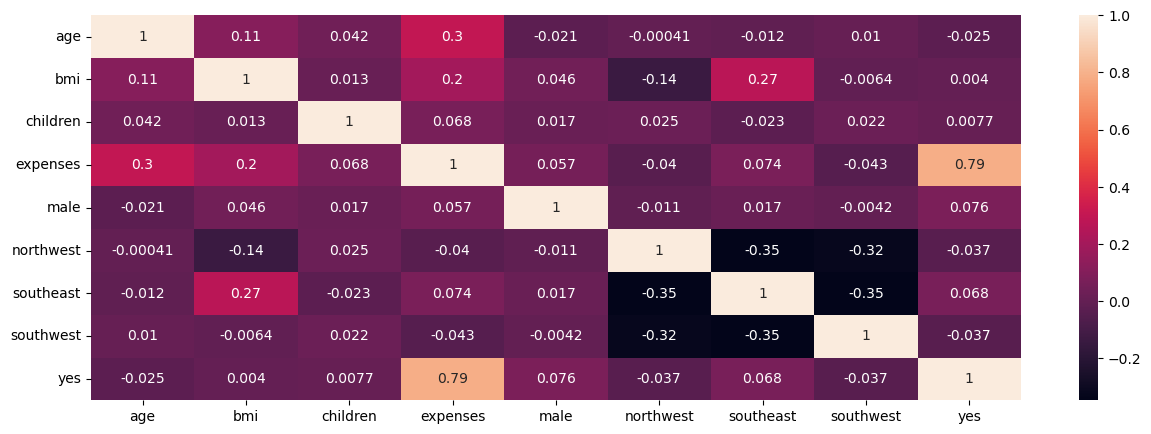

In [24]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [25]:
auto = auto[['age','bmi','children', 'male','southwest','yes','expenses']]

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 1)

In [27]:
df_train

,age,bmi,children,male,southwest,yes,expenses
744,50,26.4,0,1,0,0,8827.21
363,21,26.4,1,0,1,0,2597.78
10,25,26.2,0,1,0,0,2721.32
970,50,28.2,3,0,0,0,10702.64
634,51,39.7,1,1,1,0,9391.35
...,...,...,...,...,...,...,...
715,60,28.9,0,1,1,0,12146.97
905,26,29.4,2,0,0,0,4564.19
1096,51,35.0,2,0,0,1,44641.20
235,40,22.2,2,0,0,1,19444.27


In [28]:
df_test

,age,bmi,children,male,southwest,yes,expenses
559,19,35.5,0,1,0,0,1646.43
1087,57,31.5,0,1,0,0,11353.23
1020,51,37.0,0,1,1,0,8798.59
460,49,36.6,3,0,0,0,10381.48
802,21,22.3,1,1,1,0,2103.08
...,...,...,...,...,...,...,...
323,57,40.9,0,1,0,0,11566.30
1268,20,33.3,0,0,1,0,1880.49
134,20,28.8,0,0,0,0,2457.21
1274,26,27.1,0,1,0,1,17043.34


In [29]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['age' , 'bmi' , 'children' , 'male' , 'southwest' , 'yes']]
Y_train = df_train['expenses']
ln = LinearRegression()
model = ln.fit(X_train, Y_train)

In [30]:
# Testing
data = df_test.iloc[10:11]
actual_expenses = data.pop('expenses')

print("All data " , data)
predicted_expenses = model.predict(data)

print("Actual expenses" , actual_expenses)
print("Predicted expenses" , predicted_expenses)

All data      age   bmi  children  male  southwest  yes
48   60  24.5         0     0          0    0
Actual expenses 48    12629.9
Name: expenses, dtype: float64
Predicted expenses [11629.51068773]


In [31]:
# Alternate

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# scaler = MinMaxScaler()
# scaler

In [34]:
df_train.head()

,age,bmi,children,male,southwest,yes,expenses
744,50,26.4,0,1,0,0,8827.21
363,21,26.4,1,0,1,0,2597.78
10,25,26.2,0,1,0,0,2721.32
970,50,28.2,3,0,0,0,10702.64
634,51,39.7,1,1,1,0,9391.35


In [35]:
df_train.describe()

,age,bmi,children,male,southwest,yes,expenses
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,38.822650,30.684829,1.104701,0.511752,0.256410,0.206197,13276.698622
std,14.029097,6.087874,1.222664,0.500129,0.436884,0.404790,12197.308146
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,26.000000,26.275000,0.000000,0.000000,0.000000,0.000000,4710.600000
50%,38.000000,30.500000,1.000000,1.000000,0.000000,0.000000,9188.005000
75%,51.000000,34.725000,2.000000,1.000000,1.000000,0.000000,16604.305000
max,64.000000,53.100000,5.000000,1.000000,1.000000,1.000000,63770.430000


In [37]:
# # Apply scaler() to all the columns except the 'dummy' variables
# num_vars = ['age', 'bmi', 'children', 'expenses']

# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,age,bmi,children,male,southwest,yes,expenses
744,50,26.4,0,1,0,0,8827.21
363,21,26.4,1,0,1,0,2597.78
10,25,26.2,0,1,0,0,2721.32
970,50,28.2,3,0,0,0,10702.64
634,51,39.7,1,1,1,0,9391.35


In [39]:
df_train.describe()

,age,bmi,children,male,southwest,yes,expenses
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,38.822650,30.684829,1.104701,0.511752,0.256410,0.206197,13276.698622
std,14.029097,6.087874,1.222664,0.500129,0.436884,0.404790,12197.308146
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,26.000000,26.275000,0.000000,0.000000,0.000000,0.000000,4710.600000
50%,38.000000,30.500000,1.000000,1.000000,0.000000,0.000000,9188.005000
75%,51.000000,34.725000,2.000000,1.000000,1.000000,0.000000,16604.305000
max,64.000000,53.100000,5.000000,1.000000,1.000000,1.000000,63770.430000


In [40]:
df_train.corr()

,age,bmi,children,male,southwest,yes,expenses
age,1.000000,0.120120,0.016859,0.004261,0.015629,-0.009185,0.301822
bmi,0.120120,1.000000,-0.006109,0.046005,0.002630,0.010558,0.195820
children,0.016859,-0.006109,1.000000,0.015476,0.037786,-0.006931,0.032779
male,0.004261,0.046005,0.015476,1.000000,-0.004016,0.064620,0.049507
southwest,0.015629,0.002630,0.037786,-0.004016,1.000000,-0.021090,-0.026116
yes,-0.009185,0.010558,-0.006931,0.064620,-0.021090,1.000000,0.796133
expenses,0.301822,0.195820,0.032779,0.049507,-0.026116,0.796133,1.000000


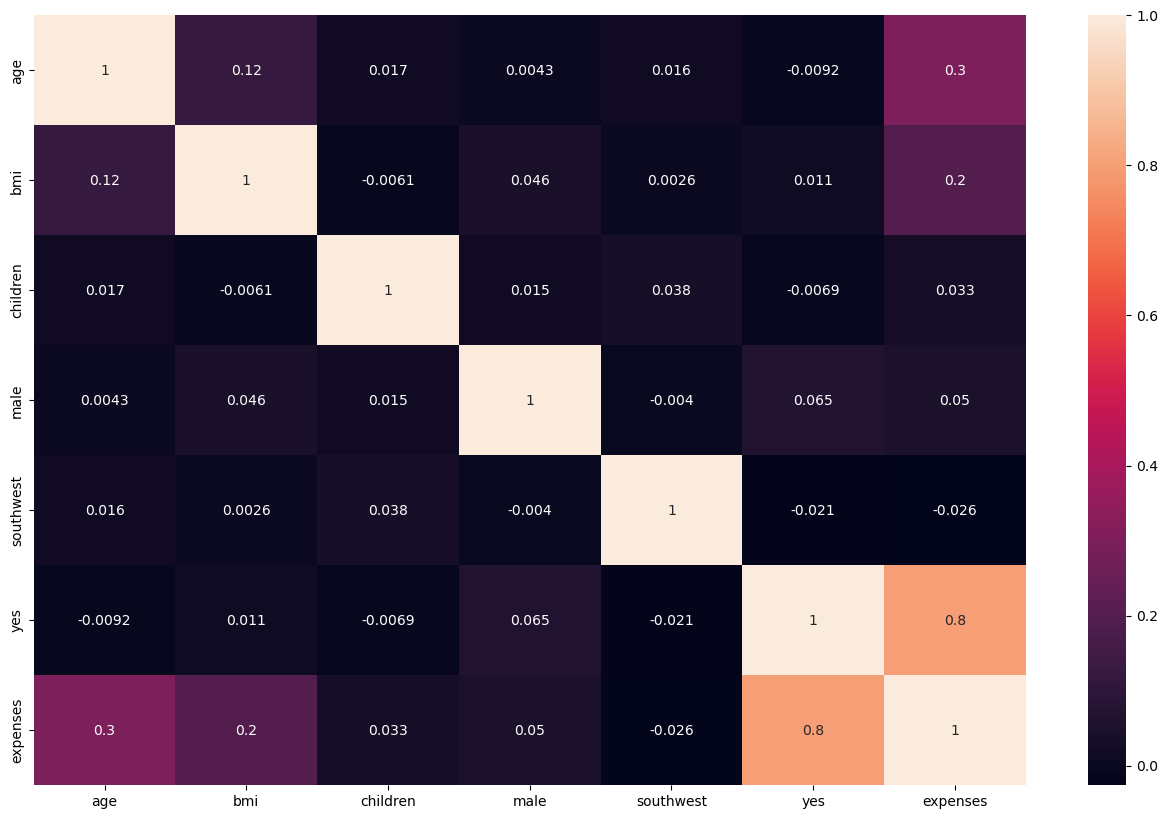

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [42]:
Y_train = df_train.pop('expenses')
X_train = df_train

In [43]:
Y_train

744      8827.21
363      2597.78
10       2721.32
970     10702.64
634      9391.35
          ...   
715     12146.97
905      4564.19
1096    44641.20
235     19444.27
1061    11554.22
Name: expenses, Length: 936, dtype: float64

In [44]:
X_train

,age,bmi,children,male,southwest,yes
744,50,26.4,0,1,0,0
363,21,26.4,1,0,1,0
10,25,26.2,0,1,0,0
970,50,28.2,3,0,0,0
634,51,39.7,1,1,1,0
...,...,...,...,...,...,...
715,60,28.9,0,1,1,0
905,26,29.4,2,0,0,0
1096,51,35.0,2,0,0,1
235,40,22.2,2,0,0,1


In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# lm.fit(X_train, y_train)

#rfe = RFE(lm, 10)
rfe = RFE(lm, n_features_to_select=6)
#Running RFE
rfe = rfe.fit(X_train, Y_train)

In [47]:
X_train.columns

Index(['age', 'bmi', 'children', 'male', 'southwest', 'yes'], dtype='object')

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('male', True, 1),
 ('southwest', True, 1),
 ('yes', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'male', 'southwest', 'yes'], dtype='object')

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
X_train_rfe

,age,bmi,children,male,southwest,yes
744,50,26.4,0,1,0,0
363,21,26.4,1,0,1,0
10,25,26.2,0,1,0,0
970,50,28.2,3,0,0,0
634,51,39.7,1,1,1,0
...,...,...,...,...,...,...
715,60,28.9,0,1,1,0
905,26,29.4,2,0,0,0
1096,51,35.0,2,0,0,1
235,40,22.2,2,0,0,1


In [52]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
X_train_rfe

,const,age,bmi,children,male,southwest,yes
744,1.0,50,26.4,0,1,0,0
363,1.0,21,26.4,1,0,1,0
10,1.0,25,26.2,0,1,0,0
970,1.0,50,28.2,3,0,0,0
634,1.0,51,39.7,1,1,1,0
...,...,...,...,...,...,...,...
715,1.0,60,28.9,0,1,1,0
905,1.0,26,29.4,2,0,0,0
1096,1.0,51,35.0,2,0,0,1
235,1.0,40,22.2,2,0,0,1


Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [54]:
lm = sm.OLS(Y_train,X_train_rfe).fit()  # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     474.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.01e-278
Time:                        17:44:43   Log-Likelihood:                -9478.4
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     929   BIC:                         1.900e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.104e+04   1140.863     -9.681      0.0

In [56]:
# Dropping southwest as p-value is high.
X_train_new1 = X_train_rfe.drop(["southwest"], axis = 1)
X_train_new1

,const,age,bmi,children,male,yes
744,1.0,50,26.4,0,1,0
363,1.0,21,26.4,1,0,0
10,1.0,25,26.2,0,1,0
970,1.0,50,28.2,3,0,0
634,1.0,51,39.7,1,1,0
...,...,...,...,...,...,...
715,1.0,60,28.9,0,1,0
905,1.0,26,29.4,2,0,0
1096,1.0,51,35.0,2,0,1
235,1.0,40,22.2,2,0,1


In [57]:
# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new1)
# X_train_lm


In [58]:
lm = sm.OLS(Y_train,X_train_new1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     568.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.37e-280
Time:                        17:44:44   Log-Likelihood:                -9478.8
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     930   BIC:                         1.900e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.114e+04   1136.139     -9.808      0.0

In [59]:
# Dropping northwest as p value is high.
X_train_new2 = X_train_new1.drop(["male"], axis = 1)

# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(Y_train,X_train_new2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     711.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          2.80e-281
Time:                        17:44:45   Log-Likelihood:                -9479.1
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     931   BIC:                         1.899e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.124e+04   1125.970     -9.985      0.0

In [60]:
# Dropping northwest as p value is high.
X_train_new3 = X_train_new2.drop(["children"], axis = 1)

# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(Y_train,X_train_new3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     943.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          7.72e-282
Time:                        17:44:45   Log-Likelihood:                -9481.3
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     932   BIC:                         1.899e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.087e+04   1113.797     -9.756      0.0

In [ ]:
#expenses  = age*252.8559 + bmi*305.4769 + yes*2.404e+04 - -1.077e+04